# Genes Annotation QC Analysis & Plots

In [4]:
import sys
import os
import glob
import re

import numpy as np
import pandas as pd

import Bio.SeqIO as SeqIO

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## BUSCO's results

## Homologies results

In [35]:
def protein_list_summary(protein_list):
    if isinstance(protein_list, (list, tuple)):
        return pd.concat([protein_list_summary(el) for el in protein_list])
    elif not isinstance(protein_list, str):
        return NotImplementedError()
    
    records = list(SeqIO.parse(protein_list, "fasta"))
    n_records = len(records)

    re_assembler_known_type = r"./out/genes_annotation_qc/(?P<assembler>\w*)/homologies/proteins.(?P<known_type>\w*).fasta"
    match = re.match(re_assembler_known_type, protein_list).groupdict()
    
    assembler = match['assembler']
    known_type = match['known_type']
    seq_id = [el.id for el in records]
    seq_length = [len(el.seq) for el in records]
    
    summary = pd.DataFrame({"assembler":assembler, "known_type":known_type, "seq_id":seq_id, "seq_len":seq_length})
    
    return summary


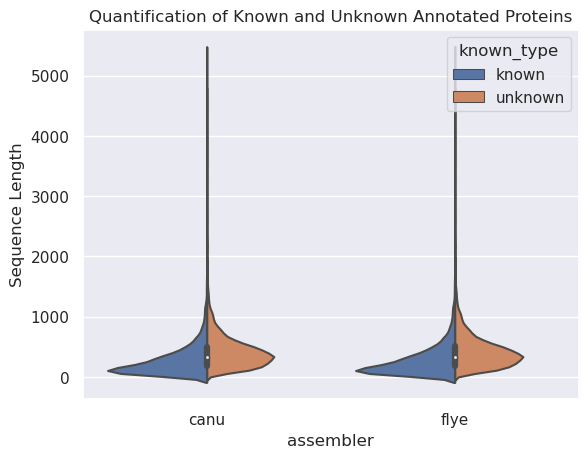

In [42]:
files = glob.glob("./out/genes_annotation_qc/*/homologies/proteins.*.fasta")
summary = protein_list_summary(files)
sns.violinplot(data=summary, x="assembler", y="seq_len", hue="known_type", split=True)
plt.title("Quantification of Known and Unknown Annotated Proteins")
plt.ylabel("Sequence Length")
plt.show()